In [142]:
import scipy
import scipy.io as scio
from scipy import stats
from scipy import ndimage
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
x=5
img=plt.imread('./ShanghaiTech/part_A/train_data/images/IMG_'+str(x)+'.jpg')
mat = scio.loadmat('./ShanghaiTech/part_A/train_data/ground-truth/GT_IMG_'+str(x)+'.mat')

In [100]:
print(mat['image_info'])

[[array([[(array([[168.93991471, 651.20488748],
       [464.12200787, 255.35733758],
       [469.23271568, 253.18915851],
       ...,
       [905.97784109, 525.60088471],
       [  9.84996896, 358.85562997],
       [ 24.17164728, 354.76372187]]), array([[585]], dtype=uint16))]],
      dtype=[('location', 'O'), ('number', 'O')])]]


In [143]:
print(img.shape)

(683, 1024, 3)


In [84]:
print(mat['image_info'][0][0][0][0][0])

[[ 29.6225116  472.92022152]
 [ 54.35533603 454.96602305]
 [ 51.79045053 460.46220626]
 ...
 [597.89732076 688.27900015]
 [965.77518336 638.44693908]
 [166.9965574  628.1873971 ]]


In [141]:

def gaussian_filter_density(gts):
    densities = []
    densities1=densities
    for gt in gts:
        print(gt.shape)
        density = np.zeros(gt.shape, dtype=np.float32)
        density1=density
        gt_count = np.count_nonzero(gt)
        if gt_count == 0:
            return density

        pts = np.array(list(zip(np.nonzero(gt)[1], np.nonzero(gt)[0])))
        #print("pts=",pts)
        leafsize = 2048
        # build kdtree
        #print 'build kdtree...'
        tree = scipy.spatial.KDTree(pts.copy(), leafsize=leafsize)
        # query kdtree
        #print 'query kdtree...' 
        distances, locations = tree.query(pts, k=4, eps=10.)
        

        #print 'generate density...'
        for i, pt in enumerate(pts):
            pt2d = np.zeros(gt.shape, dtype=np.float32)
            pt2d[pt[1],pt[0]] = 1.
            if gt_count > 1:
                sigma = distances[i][1]*0.3 #((distances[i][1]+distances[i][2]+distances[i][3])/3)*0.3 #
                sigma1= ((distances[i][1]+distances[i][2])/2)*0.3
            else:
                sigma = np.average(np.array(gt.shape))/2./2. #case: 1 point
                sigma1= np.average(np.array(gt.shape))/2./2. #case: 1 point
            density += scipy.ndimage.filters.gaussian_filter(pt2d, sigma, mode='constant')
            density1+= scipy.ndimage.filters.gaussian_filter(pt2d, sigma1, mode='constant')
        #print 'done.'
        densities.append(density)
        densities1.append(density1)
    
    return densities,densities1

k = np.zeros((img.shape[0],img.shape[1]))
gt = mat["image_info"][0][0][0][0][0]
for i in range(0,len(gt)):
    if int(gt[i][1])<img.shape[0] and int(gt[i][0])<img.shape[1]:
        k[int(gt[i][1]),int(gt[i][0])]=1
        
print("sum de k = ", np.sum(k))
dens0, dens1=gaussian_filter_density([k])
#print(dens[0])

sum de k =  584.0
(683, 1024)


KeyboardInterrupt: 

In [139]:
import seaborn as sbn
ax=sbn.heatmap(dens0[0])
ax1=sbn.heatmap(dens1[0])

NameError: name 'dens0' is not defined

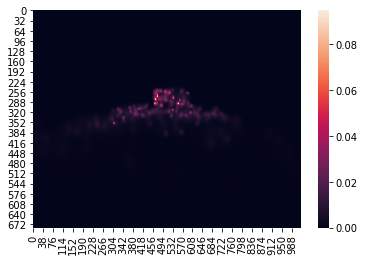

In [138]:
ax1=sbn.heatmap(dens[0])